## Data Exploration

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os
%matplotlib inline

In [2]:
#setting the directory path
os.chdir('C:\\Users\\Onkar\\Downloads\\ML')

In [3]:
#Reading test and train files
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [4]:
#Creating source column to identify test and test variables
train['source']='train'
test['source']='test'

In [5]:
#Merging train and test in order to avoid performing feature engineering twice on test and train
data=pd.concat([train,test],ignore_index=True,sort=True)

In [6]:
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [7]:
#Checking the missing values
data.apply(lambda x:sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [8]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [9]:
data.apply(lambda x:len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [10]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [12]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
categorical_columns

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source']

In [13]:
#Print frequencies of categories
for columns in categorical_columns:
    print("Frequency of Categories for %s"%columns)
    print(data[columns].value_counts())

Frequency of Categories for Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of Categories for Item_Identifier
FDR15    10
FDY09    10
FDU40    10
FDO56    10
NCQ29    10
FDX08    10
NCS29    10
NCX06    10
FDD56    10
DRG49    10
FDQ14    10
FDK09    10
DRK49    10
NCQ30    10
FDX22    10
FDR47    10
NCR30    10
FDT32    10
DRA59    10
NCX41    10
NCB18    10
NCG43    10
FDM39    10
FDS45    10
FDT36    10
FDO31    10
FDX36    10
FDX43    10
FDM12    10
FDM28    10
         ..
FDS51     8
FDW52     8
FDI58     8
FDT38     8
FDW08     8
FDU59     8
FDY50     8
FDX33     8
FDW31     8
FDE20     8
NCX17     8
FDD50     8
FDY44     8
FDX60     8
FDN58     8
NCL30     8
FDB51     8
FDR51     7
DRN11     7
FDM10     7
FDX49     7
FDM52     7
FDL50     7
FDM50     7
FDH58     7
FDS22     7
FDO33     7
NCW54     7
NCL42     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64
Frequency of

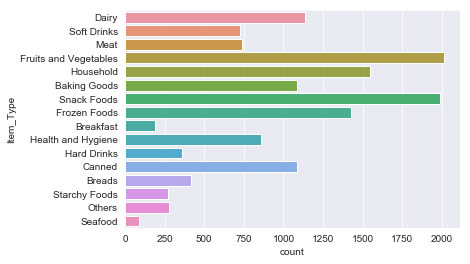

In [14]:
#Class distributions for 'Item_Type'
sns.countplot(y='Item_Type', data=data)
plt.show()

## Data Cleaning

In [15]:
#Imputing Missing Values for Item_Weight
item_weight = data.pivot_table(values='Item_Weight',index='Item_Identifier')
missing_bool = data['Item_Weight'].isnull()

In [16]:
#missing values before imputation
print('Missing values before imputation: %d'%sum(missing_bool))

Missing values before imputation: 2439


In [17]:
#Replacing missing values with weight of that particular Item Identifier
data.loc[missing_bool,'Item_Weight']=data.loc[missing_bool,'Item_Identifier'].apply(lambda x:item_weight.loc[x])

In [18]:
#missing values after imputation
print('Missing values after imputation: %d'%sum(data['Item_Weight'].isnull()))

Missing values after imputation: 0


In [19]:
#Imputing Missing Values for Outlet_Size
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [20]:
print("Missing values before imputation: %d"%(sum(data.Outlet_Size.isnull())))       

Missing values before imputation: 4016


In [21]:
data['Outlet_Size'].fillna('NaN',inplace=True)

In [22]:
for i in range(0,len(data)): 
    if (data.Outlet_Size[i] == 'NaN') & (data.Outlet_Type[i] == 'Supermarket Type1') & ((data.Outlet_Location_Type[i] == 'Tier 1') | (data.Outlet_Location_Type[i] == 'Tier 2')):
        data.loc[i,'Outlet_Size']='Small'
    elif (data.Outlet_Size[i] == 'NaN') & (data.Outlet_Type[i] == 'Supermarket Type1') & (data.Outlet_Location_Type[i] == 'Tier 3'):
        data.loc[i,'Outlet_Size']='High'
    elif (data.Outlet_Size[i] == 'NaN') & ((data.Outlet_Type[i] == 'Supermarket Type2') | (data.Outlet_Type[i] == 'Supermarket Type3')):
        data.loc[i,'Outlet_Size']='Medium'
    elif (data.Outlet_Size[i] == 'NaN') & (data.Outlet_Type[i] =='Grocery Store'):
        data.loc[i,'Outlet_Size']='Small'
    else:
        pass

In [23]:
print("Missing values after imputation: %d"%(sum(data.Outlet_Size.isnull())))

Missing values after imputation: 0


# Feature Engineering

## Step 1: Modify Item_Visibility

In [24]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [25]:
miss_bool = (data['Item_Visibility'] == 0)
print('Number of 0 values initially: %d'%sum(miss_bool))

Number of 0 values initially: 879


In [26]:
#Impute 0 values with mean visibility of that product:
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values after modification: 0


In [27]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


## Step 2: Create a broad category of Type of Item

In [28]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [29]:
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [30]:
data['Item_Type_Combined'].value_counts()
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable


## Step 3: Determine the years of operation of a store

In [31]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

## Step 4: Modify categories of Item_Fat_Content

In [32]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [33]:
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())


Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [34]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable,26


## Step 5: Numerical and One-Hot Coding of Categorical variables

In [35]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,0.931078,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0.933420,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,0.960069,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1.000000,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,1.000000,2,26,1


In [36]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [37]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Visibility_MeanRatio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,0.960069,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,1.000000,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,1.000000,...,0,1,0,0,0,0,0,0,0,0


In [38]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

## Step 6: Exporting Data

In [39]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,train,0.931078,14,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,train,0.933420,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,train,0.960069,14,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,train,1.000000,15,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,train,1.000000,26,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [41]:
#Drop unnecessary columns from train and test data set:
test=test.drop(['Item_Outlet_Sales','source'],axis=1)
train=train.drop(['source'],axis=1)

In [42]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Model Building

In [43]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0.931078,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0.933420,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0.960069,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,1.000000,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,1.000000,26,0,1,...,0,1,0,0,0,0,0,0,0,0


In [44]:
# Import necessary modules
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as stm
from sklearn.model_selection import train_test_split

In [45]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [46]:
def modelfit(model,train,test,predictors,target,IDcol,filename):
    
    #Perform cross-validation:
    # Compute 5-fold cross-validation scores: cv_scores
    cv_scores = cross_val_score(model,train[predictors],train[target],cv=5,scoring='neg_mean_squared_error')
    cv_scores=np.sqrt(np.abs(cv_scores))
    
    #Fit the algorithm on the data
    model.fit(train[predictors],train[target])
    
    #Predict training set:
    train_predictions = model.predict(train[predictors])
    
    # Compute and print R^2 and RMSE
    Rsquared=(model.score(train[predictors],train[target].values))
    rmse = np.sqrt(mean_squared_error(train[target].values,train_predictions))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" %rmse)
    print("RSquared : %.4g" %Rsquared)
    print("CV Scores : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_scores),np.std(cv_scores),np.min(cv_scores),np.max(cv_scores)))
    
    #Predict on testing data:
    test[target]=model.predict(test[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission=pd.DataFrame({ x: test[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## Linear Regression


Model Report
RMSE : 1127
RSquared : 0.5635
CV Scores : Mean - 1130 | Std - 13.74 | Min - 1114 | Max - 1151


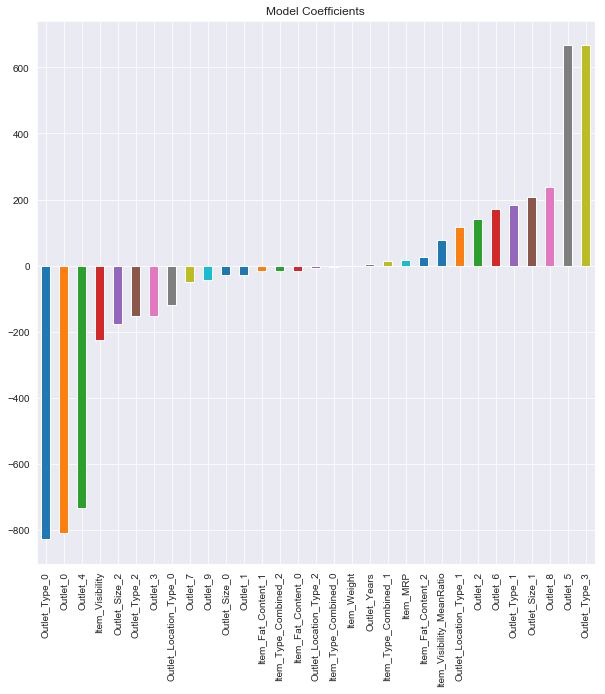

In [47]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
regressor = LinearRegression(normalize=True)
modelfit(regressor, train, test, predictors, target, IDcol, 'linear.csv')
coef1 = pd.Series(regressor.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(10,10))

## Ridge Regression Model


Model Report
RMSE : 1127
RSquared : 0.5635
CV Scores : Mean - 1130 | Std - 14.26 | Min - 1113 | Max - 1152


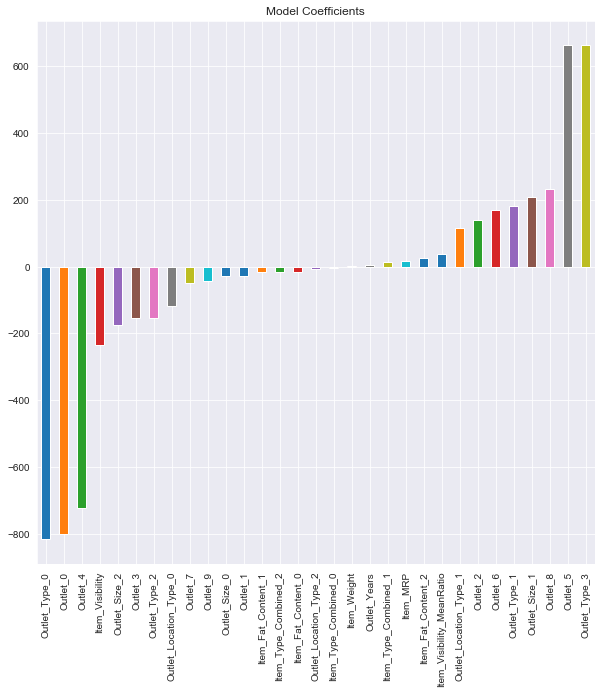

In [48]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
ridge = Ridge(alpha=0.01,normalize=True)
modelfit(ridge, train, test, predictors, target, IDcol, 'Ridge.csv')
coef2 = pd.Series(ridge.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients',figsize=(10,10))

## Lasso Regression Model


Model Report
RMSE : 1127
RSquared : 0.5635
CV Scores : Mean - 1130 | Std - 14.03 | Min - 1113 | Max - 1151


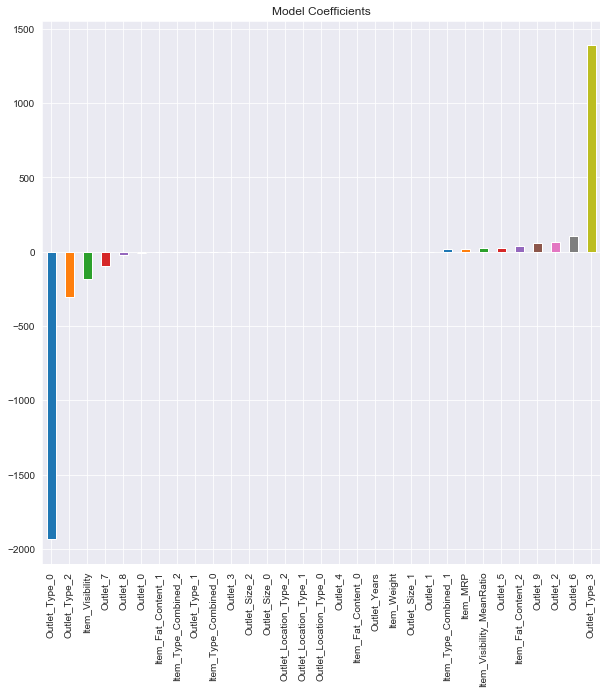

In [49]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
lasso = Lasso(alpha=0.02,normalize=True)
modelfit(lasso, train, test, predictors, target, IDcol, 'lasso.csv')
coef3 = pd.Series(lasso.coef_, predictors).sort_values()
coef3.plot(kind='bar', title='Model Coefficients',figsize=(10,10))

## Decision Tree Model


Model Report
RMSE : 1058
RSquared : 0.6158
CV Scores : Mean - 1095 | Std - 11.34 | Min - 1083 | Max - 1116


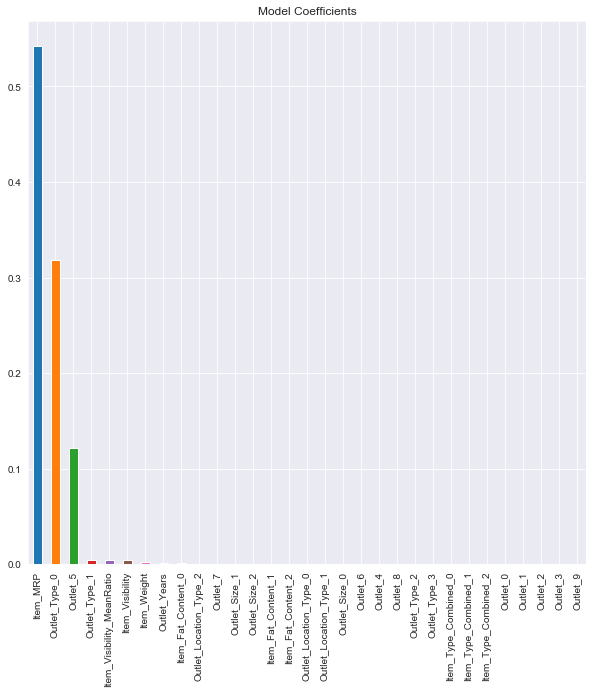

In [50]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train, test, predictors, target, IDcol, 'DT.csv')
coef4 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Model Coefficients',figsize=(10,10))

## Random Forest Model


Model Report
RMSE : 1073
RSquared : 0.6044
CV Scores : Mean - 1090 | Std - 12.31 | Min - 1074 | Max - 1110


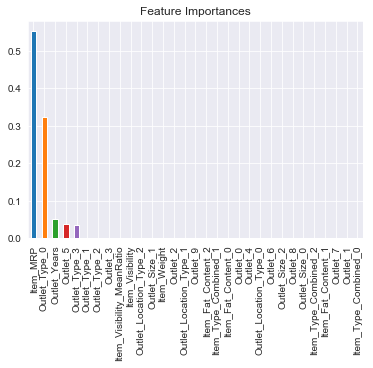

In [53]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(rf, train, test, predictors, target, IDcol, 'RandomForest.csv')
coef5 = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')